In [2]:
import numpy as np
import matplotlib.pyplot as plt

[[ 0.33333333]
 [ 0.33333333]]


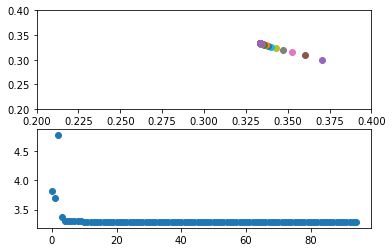

In [3]:
Eta=1
Num_iterations=100
f_values=[]
w=np.expand_dims(np.array((1/2,1/3)),1)
f,(axarr1,axarr2)=plt.subplots(2)
for i in range(Num_iterations):
    tmp=w
    grad=np.array((1/(1-tmp[0,0]-tmp[1,0])-1/tmp[0,0],1/(1-tmp[0,0]-tmp[1,0])-1/tmp[1,0]))
    tmp=tmp-Eta*np.expand_dims(grad,1)
    if (tmp[0,0]+tmp[1,0]<1 and tmp[0,0]>0 and tmp[1,0]>0):
        w=tmp
        f_values.append(-np.log(1-w[0,0]-w[1,0])-np.log(w[0,0])-np.log(w[1,0]))
        axarr1.scatter(w[0,0],w[1,0])
    else:
        Eta=Eta/2
print(w)
axarr1.set_xlim((0.2,0.4))
axarr1.set_ylim((0.2,0.4))
axarr2.scatter(np.arange(len(f_values)),f_values)
plt.show()

[[ 0.33333333]
 [ 0.33333333]]


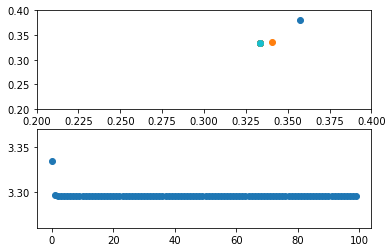

In [12]:
Eta=1
Num_iterations=100
f_values=[]
w=np.expand_dims(np.array((1/2,1/3)),1)
f,(axarr3,axarr4)=plt.subplots(2)
for i in range(Num_iterations):
    tmp=w
    grad=np.array((1/(1-tmp[0,0]-tmp[1,0])-1/tmp[0,0],1/(1-tmp[0,0]-tmp[1,0])-1/tmp[1,0]))
    hess=np.array([[1/(1-tmp[0,0]-tmp[1,0])**2+1/(tmp[0,0])**2, 1/(1-tmp[0,0]-tmp[1,0])**2],
                     [1/(1-tmp[0,0]-tmp[1,0])**2,1/(1-tmp[0,0]-tmp[1,0])**2+1/(tmp[1,0])**2]])
    tmp=tmp-Eta*np.dot(np.linalg.inv(hess),np.expand_dims(grad,1))
    if (tmp[0,0]+tmp[1,0]<1 and tmp[0,0]>0 and tmp[1,0]>0):
        w=tmp
        f_values.append(-np.log(1-w[0,0]-w[1,0])-np.log(w[0,0])-np.log(w[1,0]))
        axarr3.scatter(w[0,0],w[1,0])
    else:
        Eta=Eta/2
print(w)
axarr3.set_xlim((0.2,0.4))
axarr3.set_ylim((0.2,0.4))
axarr4.scatter(np.arange(len(f_values)),f_values)
plt.show()

The value of w0 and w1 is: 0.074,1.001


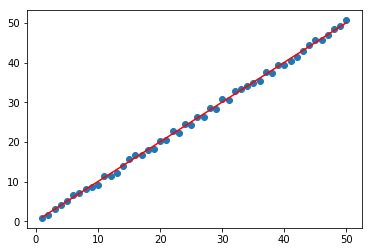

In [57]:
x_init=np.arange(50)+1
x=np.concatenate((np.ones((1,50)),np.expand_dims(x_init,0)))
y=np.expand_dims((np.random.rand(50)*2)-1+x_init,1)
w=np.dot(np.linalg.inv(np.dot(x,x.T)),np.dot(x,y))
print("The value of w0 and w1 is: {:.3f},{:.3f}".format(w[0,0],w[1,0]))
fig,ax=plt.subplots(1,sharex=True)
ax.scatter(x_init,(np.random.rand(50)*2)-1+x_init)
ax.plot(x_init,x_init*w[1,0]+w[0,0],'r')
plt.show()